Script Name: Cross_Correlation_and_NSS_Calculation.ipynb

Functionality: This script invokes the following functionalities for the Comparison of Model's performance and performance of other techniques

               1) Calculate Pearson Correlation
               2) Calculate Normalized Scanpath Saliency

In [1]:
# Connect to the Google-Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import libraries
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
import pandas as pd


In [0]:
"""
Function Name:  nss()
Parameters: Y,P,img_list
Functionality: This function
               1) Calculate the NSS score between Ground Truth and the predicted
                  Saliency for different techniques, like Itti-koch, Deep Gaze, 
                  FCN etc
               2) Appends the scores in a list and calculate Max, Min and Avg 
                  score.
Returns: max, min and avg score
"""
def nss(Y,P,img_list):
    lis=[]
    for gt, s_map, im in zip(Y,P,img_list):
      print(im)
     
      gt = np.ceil(gt/255)
      #print(gt.max())
      x,y = np.where(gt==1)
      s_map_norm = (s_map - np.mean(s_map))/np.std(s_map)

      temp = []
      for i in zip(x,y):
        temp.append(s_map_norm[i[0],i[1]])
      a= np.mean(temp)
      print("NSS"+im+": "+str(a))
      lis.append(a)
      
    print("MAX NSS: "+ str(max(lis)))
    print("MIN NSS: "+ str(min(lis)))
    print("AVG NSS: "+ str(sum(lis)/len(lis)))
    return max(lis), min(lis), sum(lis)/len(lis)

In [0]:
"""
Function Name:  cross_correlation()
Parameters: Y,P,img_list
Functionality: This function
               1) Calculate the Correlation score between Ground Truth and the 
                  predicted Saliency for different techniques, like Itti-koch, Deep Gaze, 
                  FCN etc
               2) Appends the scores in a list and calculate Max, Min and Avg 
                  score.
Returns: max, min and avg score
"""

def cal_correlation(Y,P,img_list):
  lis=[]
  for map1, map2, im in zip(Y,P,img_list):
    # Show the images
    plt.imshow(map1)
    plt.title("Ground Truth: "+im)
    plt.show()
    plt.imshow(map2)
    plt.title("Saliency: "+im)
    plt.show()

    # Calculate cross-correlation
    map1 = (map1 - map1.mean())/ map1.std() 
    map2 = (map2 - map2.mean())/ map2.std()
    a= np.corrcoef(map1.flat,map2.flat)
    #print(a)
    lis.append(a[0][1])

    print("CC for "+ im +" is: "+ str(a[0][1]))


  print("MAX CC: "+ str(max(lis)))
  print("MIN CC: "+ str(min(lis)))
  print("AVG CC: "+ str(sum(lis)/len(lis)))
  return max(lis), min(lis), sum(lis)/len(lis)


  

In [0]:
# data directory for the ground truth saliency
dir_data = "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Evaluation_Data/Ground_Truth_Eyemap/"
path_to_data = "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/"

# Path for Saliency Prediction using other different methods 

#FCN
FCN = path_to_data+"Evaluation_Data/FCN16/predicted_images/"

#Deep GazeII
Deep_GazeII = path_to_data+"Evaluation_Data/Deep_Gaze_II/Density_Prediction/"

#GDI
GDI = path_to_data+"Evaluation_Data/GDI/GDI_predictions/"

#Itti_Koch
Itti_Koch = path_to_data+"Evaluation_Data/Itti_koch/test_saliency_128/"

# Random Forest
Random_Forest = path_to_data+"Evaluation_Data/RT/RandomForestPrediction/"

# #SVM
SVM = path_to_data+"Evaluation_Data/SVM/SVM_Degree2_Prediction/"

#SALICON
SALICON = path_to_data+"Evaluation_Data/SALICON/"

# Create a dictionary using the above mentioned paths
dir_data_pred_dict= {"FCN":FCN,"Deep_GazeII":Deep_GazeII,"GDI":GDI,"Itti_Koch":Itti_Koch,"Random_Forest":Random_Forest,"SVM":SVM,"SALICON":SALICON}


In [0]:
"""
Function Name: return_image_size()
Functionalities: This function takes path of a predicted image and returns the 
                size of the image
Parameter:path
Returns: img.shape[0],img.shape[1]

"""

def return_image_size(path):
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img.shape[0],img.shape[1]

"""
Function Name: Groung_Image_Arr()
Functionalities: 1) BGR-GRAY conversion
                 2) Resizing to height*weight
                 3) values range from 0 to 255
Parameter:path, width, height,title
Returns: label

"""
def Groung_Image_Arr(path, width, height,title):
    #print(path)
    #print(title)
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (width, height))
    label = np.array(img, dtype=np.uint8) # values range from 0 to 255
    #print(label.max())
    return label


"""
Function Name: pred_img_Arr()
Functionalities: 1) BGR-GRAY conversion
                 2) Resizing to height*weight
                 3) values range from 0 to 255
Parameter:path, width, height,title
Returns: label

"""

def pred_img_Arr(path, width, height,title):
    img = cv2.imread(path,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (width, height))
    label = np.array(img, dtype=np.uint8) # values range from 0 to 255
    #print(label.max())
    return label


In [7]:

# read groud data directory and sort
saliency_data = os.listdir(dir_data)
saliency_data.sort()
#print("sorted",saliency_data)
dic={}

# Provide appropriate Metric Name
metric_name="NSS"  #correlation, NSS


for dir_data_pred_name,dir_data_pred in dir_data_pred_dict.items():
    print (dir_data_pred)
    print (dir_data_pred_name)

    # read predicted data directory and sort
    pred_saliency_data = os.listdir(dir_data_pred)
    pred_saliency_data.sort()
    #print("sorted",pred_saliency_data)


    # Take the size of the predicted image for processing of the grund truth image 
    #(Because some models return 224*224, some models, like RF, Itti-Koch and 
    # SVM return 128*128 images)
    input_width, input_height = return_image_size(dir_data_pred+pred_saliency_data[0])

    # resize if predicted imag
    if input_width>224:
      input_width, input_height = 224,224

    Y = []
    P=[]
    img_list=[]

    # create nd array for evaluation
    for im in saliency_data:
        Y.append(Groung_Image_Arr(dir_data+im, input_width, input_height,im))
        img_list.append(im)
      
    for im_pred in pred_saliency_data:
        P.append(pred_img_Arr(dir_data_pred+im_pred, input_width, input_height,im))
          

    Y = np.array(Y)
    print(Y.shape)

    P = np.array(P)
    print(P.shape)
    
    if metric_name=="NSS":
      #NSS
      mx,mn,avg=nss(Y,P,img_list)

    elif metric_name=="correlation":
      # Correlation
      mx,mn,avg= cal_correlation(Y,P,img_list)


    # Create a dictionary for appending max , min and average score for each method.
    dic_res={}
    dic_res["max"]=mx
    dic_res["min"]=mn
    dic_res["avg"]=avg

    #print(dic_res)
    dic[dir_data_pred_name]=dic_res

print(dic)
df=pd.DataFrame(dic)

# Save the results
df.to_csv(path_to_data+ "/Evaluation_Result/"+str(metric_name)+"results.csv")

    




/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Evaluation_Data/FCN16/predicted_images/
FCN
(9, 224, 224)
(9, 224, 224)
cell.png
NSScell.png: 0.41124107762342044
ebay_music.png
NSSebay_music.png: 0.43833763959022043
flickr_cover.png
NSSflickr_cover.png: 1.07340302087073
flipboard-editor.png
NSSflipboard-editor.png: 0.7399903332652981
indiegogo.png
NSSindiegogo.png: 0.524709810478528
microsoft.png
NSSmicrosoft.png: 0.5336627498371543
pinterest_about.png
NSSpinterest_about.png: 0.8100982817863237
science.png
NSSscience.png: 0.48799438317164734
zaobao.png
NSSzaobao.png: 0.8397118797055032
MAX NSS: 1.07340302087073
MIN NSS: 0.41124107762342044
AVG NSS: 0.6510165751476472
/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Evaluation_Data/Deep_Gaze_II/Density_Prediction/
Deep_GazeII
(9, 224, 224)
(9, 224, 224)
cell.png
NSScell.png: 0.3013937598551182
ebay_music.png
NSSebay_music.png: 0.3123538734795365
flickr_cover.png
NSSflickr_cover.png: 0.9829035599258384
flipboard-editor.p

Plot Metric Results

                    max       min       avg
FCN            1.073403  0.411241  0.651017
Deep_GazeII    0.982904  0.291201  0.580536
GDI            1.172464  0.392620  0.807456
Itti_Koch      0.834993  0.093350  0.345352
Random_Forest  0.734501  0.194961  0.386964
SVM            0.879414  0.106124  0.396308
SALICON        1.092606  0.436613  0.718817


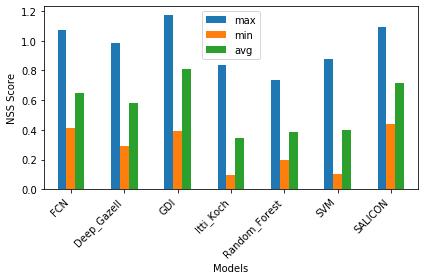

In [8]:
df_new=df.T
print(df_new)

#df= df.reset_index()
import seaborn as sns

fig = df_new.plot(kind='bar')
#plt.margins(0.02)
plt.ylabel(metric_name+" Score")
plt.xlabel('Models')
fig.set_xticklabels(df_new.T.columns, rotation = 45, ha="right")
plt.tight_layout()

#plt.grid(True)

# Save the plot
plt.savefig(path_to_data+ "/Evaluation_Result/"+str(metric_name)+".png")
plt.show()